In [1]:
import os

import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn import set_config
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier, plot_importance

from src.config import CATEGORICAL_COL, NUMERICAL_COL, LABEL_COL
from src.utils import plot_metric_curves
from src.transformer import preprocessor_numeric, preprocessor_full

set_config(display='diagram')   

# Load Dataset

In [11]:
train = pd.read_csv('../data/users_train.csv')
test = pd.read_csv('../data/users_test.csv')

train.drop(columns=['user_first_engagement','user_pseudo_id'], inplace=True)
test.drop(columns=['user_first_engagement','user_pseudo_id'], inplace=True)

x_train, y_train = train.drop(columns=[LABEL_COL]), train[LABEL_COL]
x_test, y_test = test.drop(columns=[LABEL_COL]), test[LABEL_COL]

scale_pos_weight = 1/y_train.mean()

# Modeling

## Only numeric features
### Model

In [3]:
xgb_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor_numeric()),
        (
            "linear_regressor",
            XGBClassifier(
                scale_pos_weight=scale_pos_weight,
                use_label_encoder=False,
                eval_metric='logloss',
            ),
        ),
    ]
)
xgb_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cnt_user_engagement',
                                                   'cnt_level_start_quickplay',
                                                   'cnt_level_end_quickplay',
                                                   'cnt_level_complete_quickplay',
                                                   'cnt_level_reset_quickplay',
                                                   'cnt_post_score',
                                                   'cnt_spend...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=4.293961512939616, subsample=1,
                               tree_method='exact', use_label_encoder=False,
                               validate_parameters=1, verbosity=None))])

### Evaluation

In [5]:
y_val_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,

              precision    recall  f1-score   support

           0       0.87      0.59      0.70       564
           1       0.31      0.67      0.42       155

    accuracy                           0.61       719
   macro avg       0.59      0.63      0.56       719
weighted avg       0.75      0.61      0.64       719



None

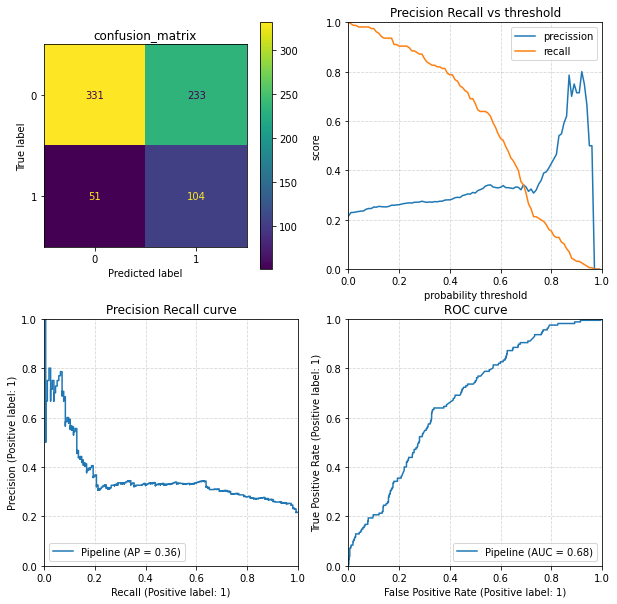

In [4]:
y_val_pred = xgb_model.predict(x_val)

display(print(metrics.classification_report(y_val, y_val_pred)))

ax = plot_metric_curves(xgb_model, x_val, y_val)

## Numerical and Categorical features


### Modeling

In [7]:
xgb_model_full = Pipeline(
    steps=[
        ("preprocessor", preprocessor_full()),
        (
            "linear_regressor",
            XGBClassifier(
                scale_pos_weight=scale_pos_weight,
                use_label_encoder=False,
                eval_metric='logloss',
            ),
        ),
    ]
)
xgb_model_full.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cnt_user_engagement',
                                                   'cnt_level_start_quickplay',
                                                   'cnt_level_end_quickplay',
                                                   'cnt_level_complete_quickplay',
                                                   'cnt_level_reset_quickplay',
                                                   'cnt_post_score',
                                                   'cnt_spend...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=4.293961512939616, subsample=1,
                               tree_method='exact', use_label_encoder=False,
                               validate_parameters=1, verbosity=None))])

### Evaluation

              precision    recall  f1-score   support

           0       0.86      0.57      0.69       564
           1       0.30      0.67      0.42       155

    accuracy                           0.59       719
   macro avg       0.58      0.62      0.55       719
weighted avg       0.74      0.59      0.63       719



None

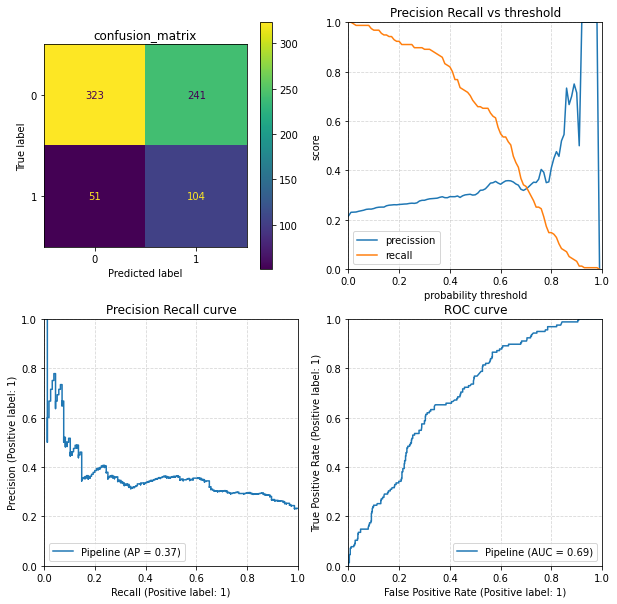

In [8]:
y_val_pred = xgb_model_full.predict(x_val)

display(print(metrics.classification_report(y_val, y_val_pred)))

ax = plot_metric_curves(xgb_model_full, x_val, y_val)

## Save model 

In [9]:
model_path = 'models'
if not os.path.exists(model_path):
    os.makedirs(model_path)

joblib.dump(xgb_model_full, f'{model_path}/xgb_model_full.job')

['models/xgb_model_full.job']

In [19]:
params = {
    "booster": "dart",
    "lambda": 3.4072624316382755e-06,
    "alpha": 2.7639023005641904e-05,
    "subsample": 0.4928977257259409,
    "colsample_bytree": 0.4909613136622061,
    "max_depth": 11,
    "min_child_weight": 2,
    "eta": 0.062479312424644246,
    "gamma": 0.0008161023806105572,
    "grow_policy": "depthwise",
    "sample_type": "uniform",
    "normalize_type": "forest",
    "rate_drop": 0.00018505969523426347,
    "skip_drop": 1.9163062639065358e-05,
    "scale_pos_weight": scale_pos_weight,
    "use_label_encoder": False,
    "eval_metric": "logloss",
}

xgb_model_full = Pipeline(
    steps=[
        ("preprocessor", preprocessor_full()),
        (
            "linear_regressor",
            XGBClassifier(**params),
        ),
    ]
)
xgb_model_full.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cnt_user_engagement',
                                                   'cnt_level_start_quickplay',
                                                   'cnt_level_end_quickplay',
                                                   'cnt_level_complete_quickplay',
                                                   'cnt_level_reset_quickplay',
                                                   'cnt_post_score',
                                                   'cnt_spend...
                               lambda=3.4072624316382755e-06,
                               learning_rate=0.0624793135, max_delta_step=0,
                               max_depth=11, min_child_weight=2, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, normalize_type='forest',
                               num_parallel_tree=1, random_state=0,
                               rate_drop=0.00018505969523426347,
                               reg_alpha=2.76390219e-05,
                               reg_lambda=3.40726228e-06, sample_type='uniform',
                               scale_pos_weight=4.328717639975918, ...))])

### Evaluation

              precision    recall  f1-score   support

           0       0.96      0.72      0.83      5529
           1       0.49      0.90      0.64      1661

    accuracy                           0.76      7190
   macro avg       0.73      0.81      0.73      7190
weighted avg       0.85      0.76      0.78      7190



None

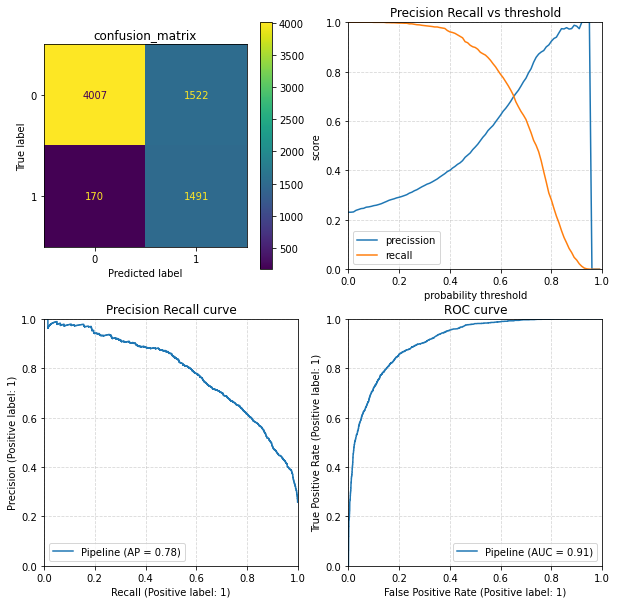

In [20]:
x = x_train
y = y_train

y_pred = xgb_model_full.predict(x)

display(print(metrics.classification_report(y, y_pred)))

ax = plot_metric_curves(xgb_model_full, x, y)

              precision    recall  f1-score   support

           0       0.85      0.62      0.72       614
           1       0.34      0.65      0.45       185

    accuracy                           0.63       799
   macro avg       0.60      0.64      0.58       799
weighted avg       0.74      0.63      0.66       799



None

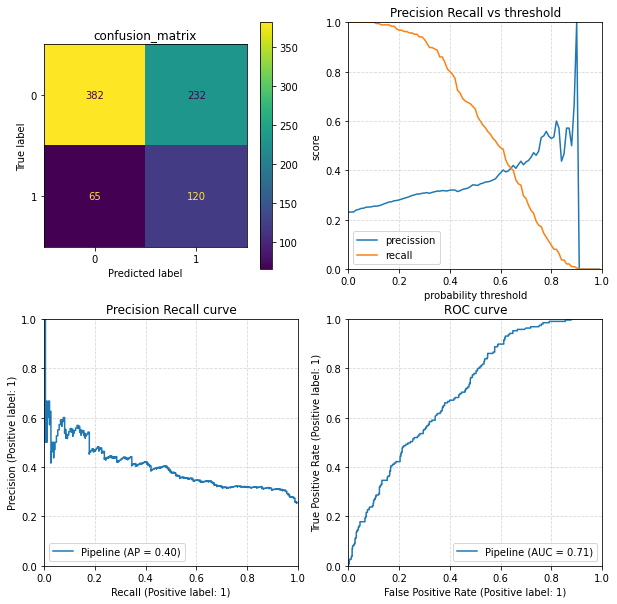

In [21]:
x = x_test
y = y_test

y_pred = xgb_model_full.predict(x)

display(print(metrics.classification_report(y, y_pred)))

ax = plot_metric_curves(xgb_model_full, x, y)